In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from wordcloud import WordCloud, STOPWORDS
from pandas import json_normalize
import json
import random


# first look at the data
# we have 29 variables 
spotify_1 = pd.read_csv('./Spotify.csv',encoding='ISO-8859-1', sep = ',')
pd.set_option('display.max_columns', None)
spotify_1.head(10)

# all the odd characters are removed
spotify_1['Artist'] = spotify_1['Artist'].str.replace('¿', '')
spotify_1['Artist'] = spotify_1['Artist'].str.replace('ï', '')
spotify_1['Artist'] = spotify_1['Artist'].str.replace('ý', '')

#remove all duplicate titles
spotify_1 = spotify_1.drop_duplicates(subset=['Track'])

#release date could be datetime, make strs into ints
spotify_1['Release Date'] = pd.to_datetime(spotify_1['Release Date'])

#extract release month
spotify_1['MonthRelease'] = spotify_1['Release Date'].dt.to_period('M')

# remove commas 
spotify_1['All Time Rank'] = spotify_1['All Time Rank'].str.replace(',', '', regex=True)
spotify_1['Spotify Streams'] = spotify_1['Spotify Streams'].str.replace(',', '', regex=True)
spotify_1['Spotify Playlist Reach'] = spotify_1['Spotify Playlist Reach'].str.replace(',', '', regex=True)
spotify_1['Spotify Playlist Count'] = spotify_1['Spotify Playlist Count'].str.replace(',', '', regex=True)
spotify_1['YouTube Views'] = spotify_1['YouTube Views'].str.replace(',', '', regex=True)
spotify_1['TikTok Views'] = spotify_1['TikTok Views'].str.replace(',', '', regex=True)
spotify_1['Pandora Streams'] = spotify_1['Pandora Streams'].str.replace(',', '', regex=True)
spotify_1['AirPlay Spins'] = spotify_1['AirPlay Spins'].str.replace(',', '', regex=True)
spotify_1['Soundcloud Streams'] = spotify_1['Soundcloud Streams'].str.replace(',', '', regex=True)

#make numeric
spotify_1['All Time Rank'] = spotify_1['All Time Rank'].astype(int)
spotify_1['Spotify Streams'] = spotify_1['Spotify Streams'].astype(float)
spotify_1['Spotify Playlist Reach'] = spotify_1['Spotify Playlist Reach'].astype(float)
spotify_1['Spotify Playlist Count'] = spotify_1['Spotify Playlist Count'].astype(float)
spotify_1['YouTube Views'] = spotify_1['YouTube Views'].astype(float)
spotify_1['TikTok Views'] = spotify_1['TikTok Views'].astype(float)
spotify_1['Pandora Streams'] = spotify_1['Pandora Streams'].astype(float)
spotify_1['AirPlay Spins'] = spotify_1['AirPlay Spins'].astype(float)
spotify_1['Soundcloud Streams'] = spotify_1['Soundcloud Streams'].astype(float)


# add total stream variable, skip missing vals
spotify_1['TotalStreams'] = spotify_1[['Spotify Streams','YouTube Views','TikTok Views','Pandora Streams','AirPlay Spins','Soundcloud Streams']].sum(axis=1, skipna=True)

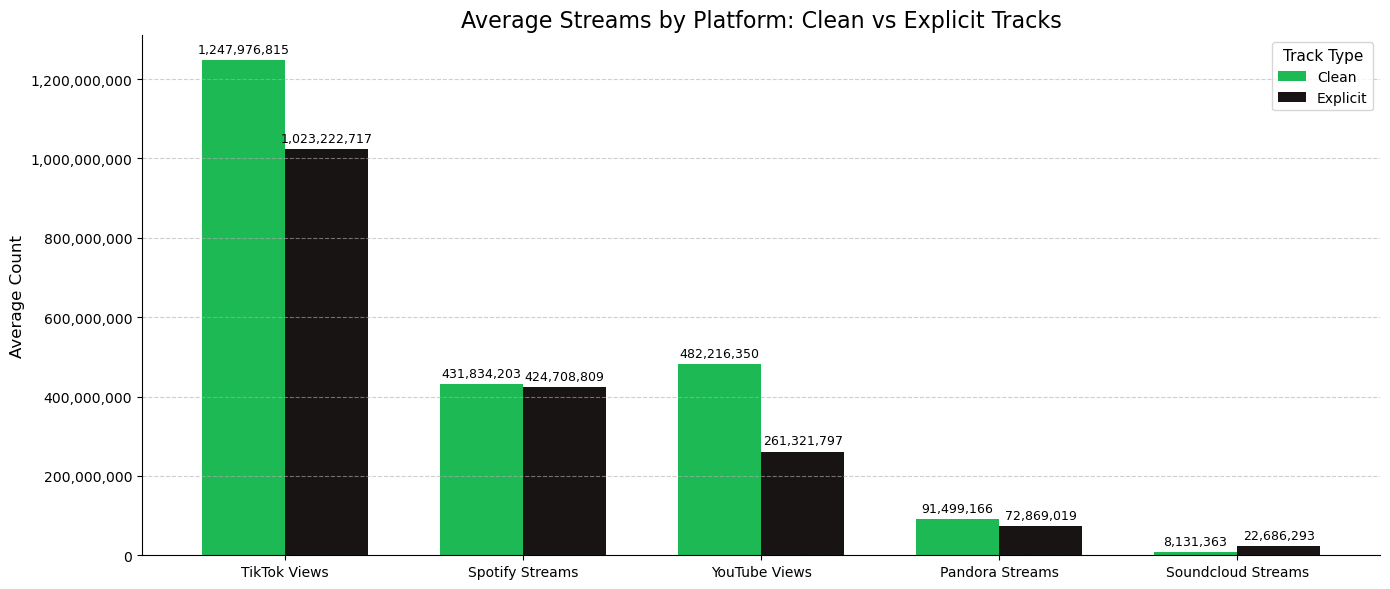

In [2]:
platform_cols = ["Spotify Streams", "YouTube Views", "TikTok Views","Pandora Streams", "Soundcloud Streams"]
mean_values = spotify_1.groupby("Explicit Track")[platform_cols].mean().T
mean_values.columns = ["Clean", "Explicit"]

mean_values["Total Avg"] = mean_values["Clean"] + mean_values["Explicit"]
mean_values = mean_values.sort_values("Total Avg", ascending=False)
mean_values = mean_values.drop(columns="Total Avg")

ax = mean_values.plot(
    kind="bar",
    figsize=(14, 6),
    width=0.7,
    color=["#1DB954", "#191414"]
)

for container in ax.containers:
    labels = [f"{int(value):,}" for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="edge", fontsize=9, padding=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Average Streams by Platform: Clean vs Explicit Tracks", fontsize=16)
plt.ylabel("Average Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(title="Track Type", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


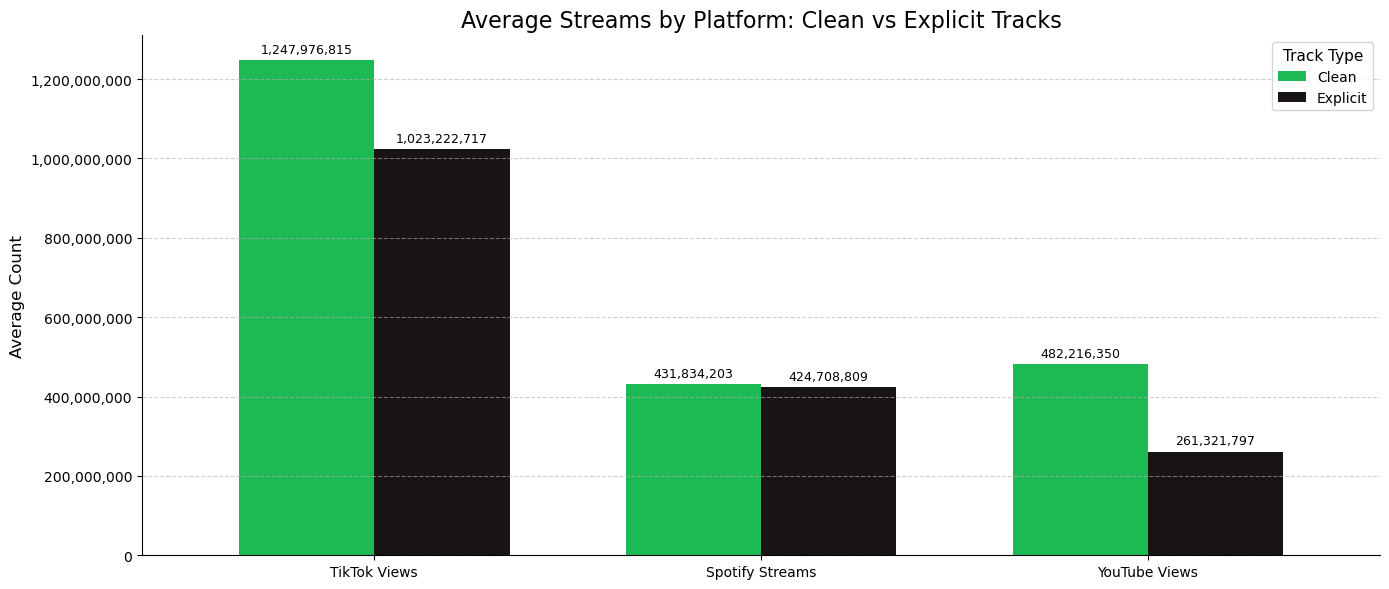

In [3]:
platform_cols = ["Spotify Streams", "YouTube Views", "TikTok Views"]
mean_values = spotify_1.groupby("Explicit Track")[platform_cols].mean().T
mean_values.columns = ["Clean", "Explicit"]

mean_values["Total Avg"] = mean_values["Clean"] + mean_values["Explicit"]
mean_values = mean_values.sort_values("Total Avg", ascending=False)
mean_values = mean_values.drop(columns="Total Avg")

ax = mean_values.plot(
    kind="bar",
    figsize=(14, 6),
    width=0.7,
    color=["#1DB954", "#191414"]
)

for container in ax.containers:
    labels = [f"{int(value):,}" for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type="edge", fontsize=9, padding=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Average Streams by Platform: Clean vs Explicit Tracks", fontsize=16)
plt.ylabel("Average Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(title="Track Type", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


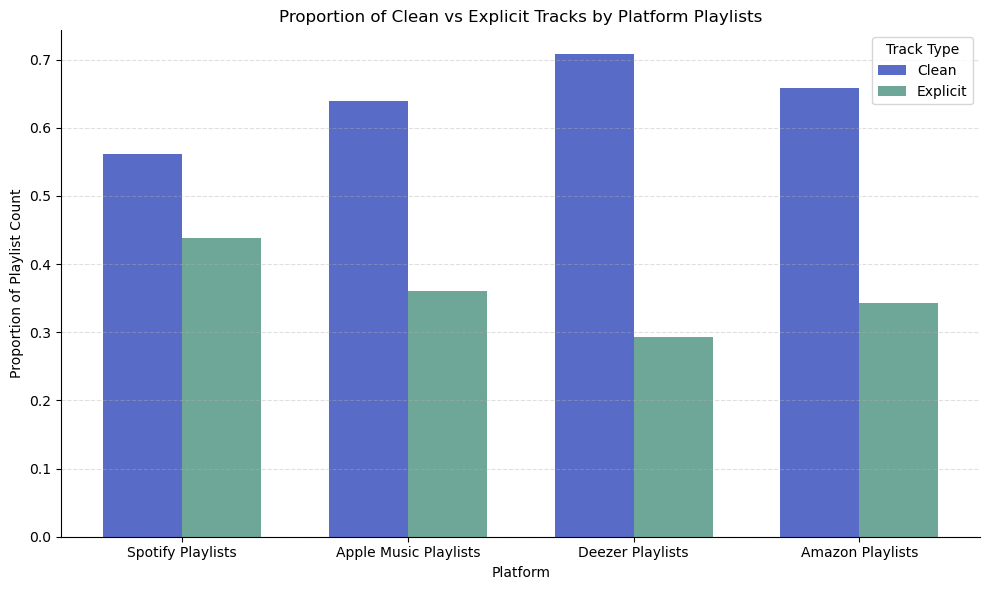

In [4]:
# Clean and label track type
spotify_1['Explicit Track'] = spotify_1['Explicit Track'].fillna(0).astype(int)
spotify_1['Track Type'] = spotify_1['Explicit Track'].map({0: 'Clean', 1: 'Explicit'})

platform_columns = ['Spotify Playlist Count', 'Apple Music Playlist Count', 
                    'Deezer Playlist Count', 'Amazon Playlist Count']

# Calculate proportions
clean_props = []
explicit_props = []

for col in platform_columns:
    counts = spotify_1.groupby('Track Type')[col].sum()
    total = counts.sum()
    clean_props.append(counts.get('Clean', 0) / total)
    explicit_props.append(counts.get('Explicit', 0) / total)

# Create the plot
x = np.arange(len(platform_columns))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x - width/2, clean_props, width, label='Clean', color='#2d46b9ff', alpha=0.8)
plt.bar(x + width/2, explicit_props, width, label='Explicit', color='#4a917d', alpha=0.8)

plt.xlabel('Platform')
plt.ylabel('Proportion of Playlist Count')
plt.title('Proportion of Clean vs Explicit Tracks by Platform Playlists')
custom_labels = ['Spotify Playlists', 'Apple Music Playlists', 'Deezer Playlists', 'Amazon Playlists']
plt.xticks(x, custom_labels)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title='Track Type')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig("top_songs.png", format='png', dpi=300, transparent=True)
plt.show()

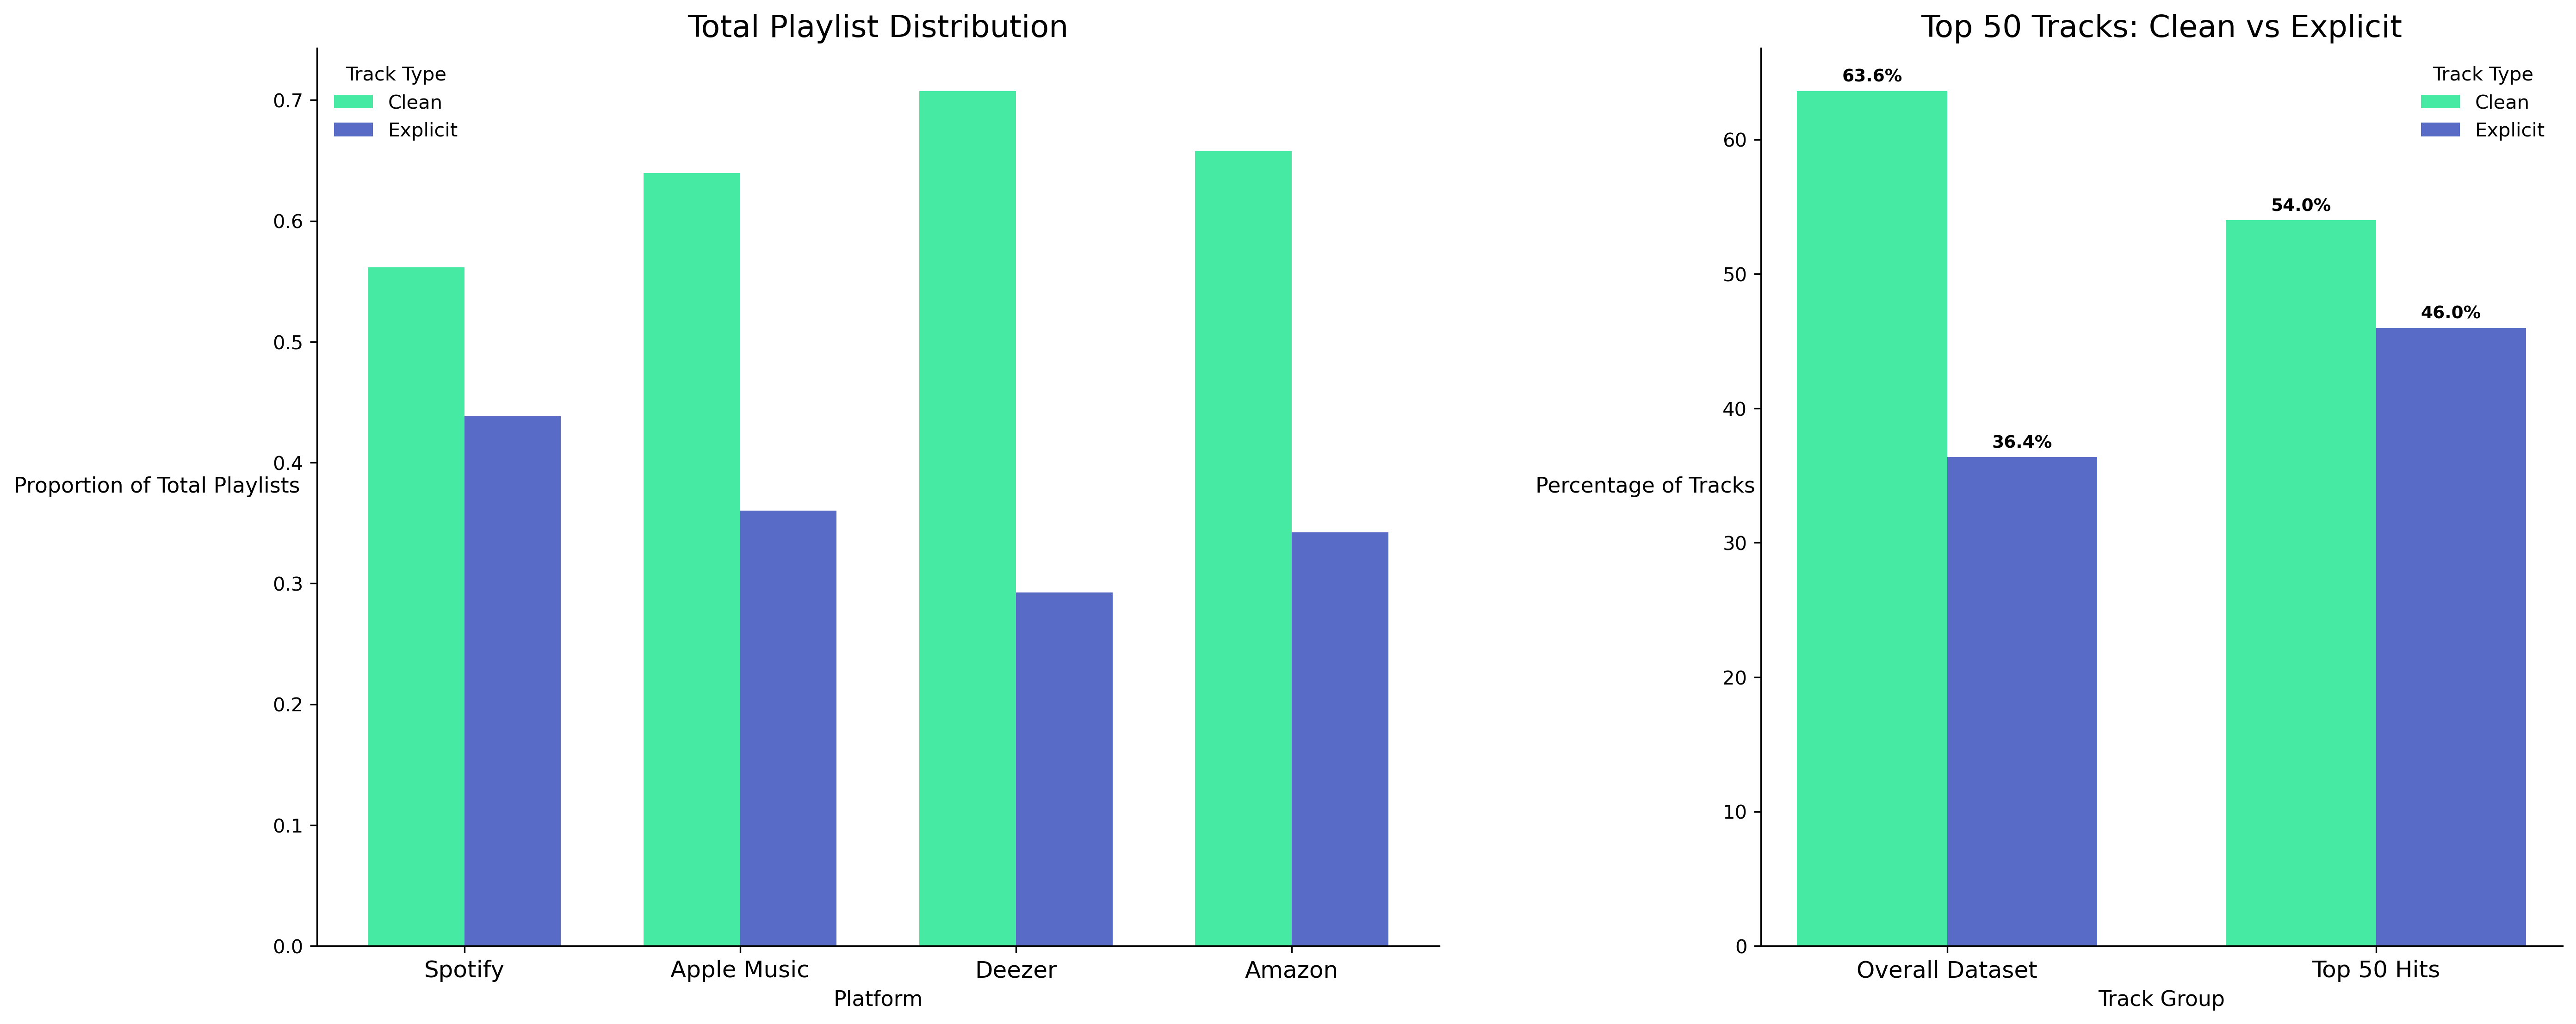

In [5]:
spotify_1['Explicit Track'] = spotify_1['Explicit Track'].fillna(0).astype(int)
spotify_1['Track Type'] = spotify_1['Explicit Track'].map({0: 'Clean', 1: 'Explicit'})

# Define playlist columns
playlist_columns = ['Spotify Playlist Count', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18.64, 7.46), dpi=300, gridspec_kw={'width_ratios': [3.5, 2.5]})

# Plot 1: Total Playlist Proportions (your existing plot)
clean_total_props = []
explicit_total_props = []

for col in playlist_columns:
    counts = spotify_1.groupby('Track Type')[col].sum()
    total = counts.sum()
    clean_total_props.append(counts.get('Clean', 0) / total)
    explicit_total_props.append(counts.get('Explicit', 0) / total)

x = np.arange(len(playlist_columns))
width = 0.35

ax1.bar(x - width/2, clean_total_props, width, label='Clean', color='#19e58cff', alpha=0.8)
ax1.bar(x + width/2, explicit_total_props, width, label='Explicit', color='#2d46b9ff', alpha=0.8)

ax1.set_xlabel('Platform',fontsize=11)
ax1.set_title('Total Playlist Distribution',fontsize=16)
platform_labels = ['Spotify', 'Apple Music', 'Deezer', 'Amazon']
ax1.set_xticks(x)
ax1.set_xticklabels(platform_labels, fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.4)
legend1 = ax1.legend(title='Track Type',loc='upper left')
legend1.get_frame().set_facecolor('none')
legend1.get_frame().set_edgecolor('none')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Plot 2: Top Performer Analysis
# Get top 50 tracks
top_50 = spotify_1.iloc[0:50]

# Calculate percentages in top 50
top_50_clean = len(top_50[top_50['Track Type'] == 'Clean'])
top_50_explicit = len(top_50[top_50['Track Type'] == 'Explicit'])

top_50_clean_pct = top_50_clean / 50 * 100
top_50_explicit_pct = top_50_explicit / 50 * 100

# Overall dataset percentages
total_clean = len(spotify_1[spotify_1['Track Type'] == 'Clean'])
total_explicit = len(spotify_1[spotify_1['Track Type'] == 'Explicit'])
total_tracks = total_clean + total_explicit

dataset_clean_pct = total_clean / total_tracks * 100
dataset_explicit_pct = total_explicit / total_tracks * 100

# Create comparison
categories = ['Overall Dataset', 'Top 50 Hits']
clean_percentages = [dataset_clean_pct, top_50_clean_pct]
explicit_percentages = [dataset_explicit_pct, top_50_explicit_pct]

x2 = np.arange(len(categories))
width = 0.35

ax2.bar(x2 - width/2, clean_percentages, width, label='Clean', color='#19e58cff', alpha=0.8)
ax2.bar(x2 + width/2, explicit_percentages, width, label='Explicit', color='#2d46b9ff', alpha=0.8)

ax2.set_xlabel('Track Group',fontsize=11)
ax2.set_ylabel('Percentage of Tracks',fontsize=11)
ax2.set_title('Top 50 Tracks: Clean vs Explicit',fontsize=16)
ax2.set_xticks(x2)
ax2.set_xticklabels(categories, fontsize=12)
legend2 = ax2.legend(title='Track Type')
legend2.get_frame().set_facecolor('none')
legend2.get_frame().set_edgecolor('none')
ax2.grid(axis='y', linestyle='--', alpha=0.4)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Add percentage labels on bars
for i, (clean_pct, explicit_pct) in enumerate(zip(clean_percentages, explicit_percentages)):
    ax2.annotate(f'{clean_pct:.1f}%', xy=(i - width/2, clean_pct), 
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', fontweight='bold', fontsize=9)
    ax2.annotate(f'{explicit_pct:.1f}%', xy=(i + width/2, explicit_pct), 
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

ax1.set_ylabel('Proportion of Total Playlists', fontsize=11, rotation=0, labelpad=60)
ax2.set_ylabel('Percentage of Tracks', fontsize=11, rotation=0, labelpad=40)
ax1.grid(False)
ax2.grid(False)

plt.tight_layout(pad=1.0, w_pad=5.0)
plt.savefig("cve.png", format='png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()